In [3]:
'''Monte Carlo Simulation example to predict budget for sales commission for the following year.

Two components to MC Simulation which are: 
    1) The equation to evaluate
    2) Random variables as input
    
Description: Commission rate based on percentage_to_target(actual sale/target sale) '''

#import modules and set grid style
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [4]:
'''Make use of prior info if available, for example: 

1) Distribution of %_To_Target from previous yrs - Normal Distribution with mean of 100% and std_dev of 10%'''

avg = 1
std_dev = 0.1
num_reps = 500
num_simulations = 1000 #no of MC simulations

#generating 500 random pct_to_target values constrained by hist distb
pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)

print(pct_to_target[0:10])

'''
2) Historical Distribution of Sales Target. 
Example assumes a unifrom distb to show integration of diff distb types'''

sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_prob)

print(sales_target[0:10])

[1.14 0.96 0.77 1.06 0.86 0.94 1.04 0.76 1.19 1.07]
[ 75000 100000 200000 500000 100000  75000 200000 100000 200000 200000]


In [5]:
'''Organize data in pandas dataframe'''

df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target, 'Sales_Target': sales_target} )
df['Sales'] = df['Pct_To_Target']*df['Sales_Target']

df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.14,75000,85500.0
1,0.96,100000,96000.0
2,0.77,200000,154000.0
3,1.06,500000,530000.0
4,0.86,100000,86000.0


In [7]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04
    
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Sales']*df['Commission_Rate']

#Sum the Commission_Amount would be considered 1 simulation of MC
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.14,75000,85500.0,0.04,3420.0
1,0.96,100000,96000.0,0.03,2880.0
2,0.77,200000,154000.0,0.02,3080.0
3,1.06,500000,530000.0,0.04,21200.0
4,0.86,100000,86000.0,0.02,1720.0


In [9]:
'''Now to Loop for N number of simulations and save to a List'''

#Define a list to store simulation results
all_stats = []

#Loop for N simulations
for i in range(num_simulations):
    pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)
    sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_prob)
    
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target, 'Sales_Target': sales_target} )
    df['Sales'] = df['Pct_To_Target']*df['Sales_Target']
    
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Sales']*df['Commission_Rate']
    
    #Append summation of simulation results to list
    all_stats.append([df['Sales'].sum().round(0), df['Commission_Amount'].sum().round(0), df['Sales_Target'].sum().round(0)])

In [10]:
#To Analyze results in List, build another DataFrame

results_df = pd.DataFrame.from_records(all_stats, columns=['Sales','Commission_Amount','Sales_Target'])

results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,766,455.25","2,860,762.872","83,760,975.0"
std,"2,644,348.1862531262","99,778.41169778444","2,617,208.427758349"
min,"76,536,750.0","2,582,078.0","76,775,000.0"
25%,"81,791,187.5","2,787,127.5","81,900,000.0"
50%,"83,683,750.0","2,861,512.5","83,725,000.0"
75%,"85,532,812.5","2,925,363.5","85,500,000.0"
max,"92,353,250.0","3,153,758.0","92,350,000.0"


Text(0.5, 1.0, 'Histogram of Commission Budget Forecast')

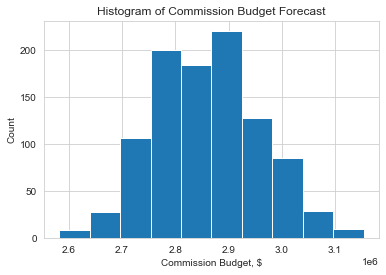

In [12]:
#Histogram of Commission_Amount

import matplotlib.pyplot as plt

plt.hist(results_df['Commission_Amount'])

plt.xlabel('Commission Budget, $')
plt.ylabel('Count')
plt.title('Histogram of Commission Budget Forecast')